In [18]:
#Importing useful modules.
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [19]:
%matplotlib inline

In [20]:
def Open_File(file_name):
    '''Function takes one input argument, a JSON-file,corresponding to the saved file-name,for each park, 
    from the result of the request to Twitters API and converts the JSON-file to a dictionary.   
    IN: file_name(JSON-object).
    OUT: Tweet_Data (Dictionary), Dictionary of the JSON-file.'''
    
    with open(file_name) as file:
        Tweet_Data= json.load(file)

    return Tweet_Data

In [21]:
def ToDataframe_time(Tweet_Data):
    ''' Function takes a dictionary corresponding to the JSON-file for each park, Extracts the "Timestamp" data for each Tweet
    and returns a Pandas DataFrame with 5 columns one for each attribute of the Timestamp data corresponding to:
    "DayofWeek", "Month", "Date", "Hour" and "Year". 
    IN: Tweet_Data(Dictionary).
    OUT: Pandas DataFrame with 5 columns,"DayofWeek", "Month", "Date", "Hour" and "year". '''
    
    Df_list=[]
    for item in Tweet_Data['statuses']:
        Df_list.append(item['created_at'])
    
    Df_org=pd.DataFrame(data=Df_list,columns=['Timestamp'])
    
    
    Df_org['Dayofweek']=Df_org['Timestamp'].apply(lambda x: x.split(' ')[0])
    Df_org['Month']=Df_org['Timestamp'].apply(lambda x: x.split(' ')[1])
    Df_org['Date']=Df_org['Timestamp'].apply(lambda x: x.split(' ')[2])
    Df_org['Hour']=Df_org['Timestamp'].apply(lambda x: x.split(' ')[3][:2])
    Df_org['Year']=Df_org['Timestamp'].apply(lambda x: x.split(' ')[-1])
    
    return Df_org
        

    


    
    
    
    

C:\Users\theod\anaconda3\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


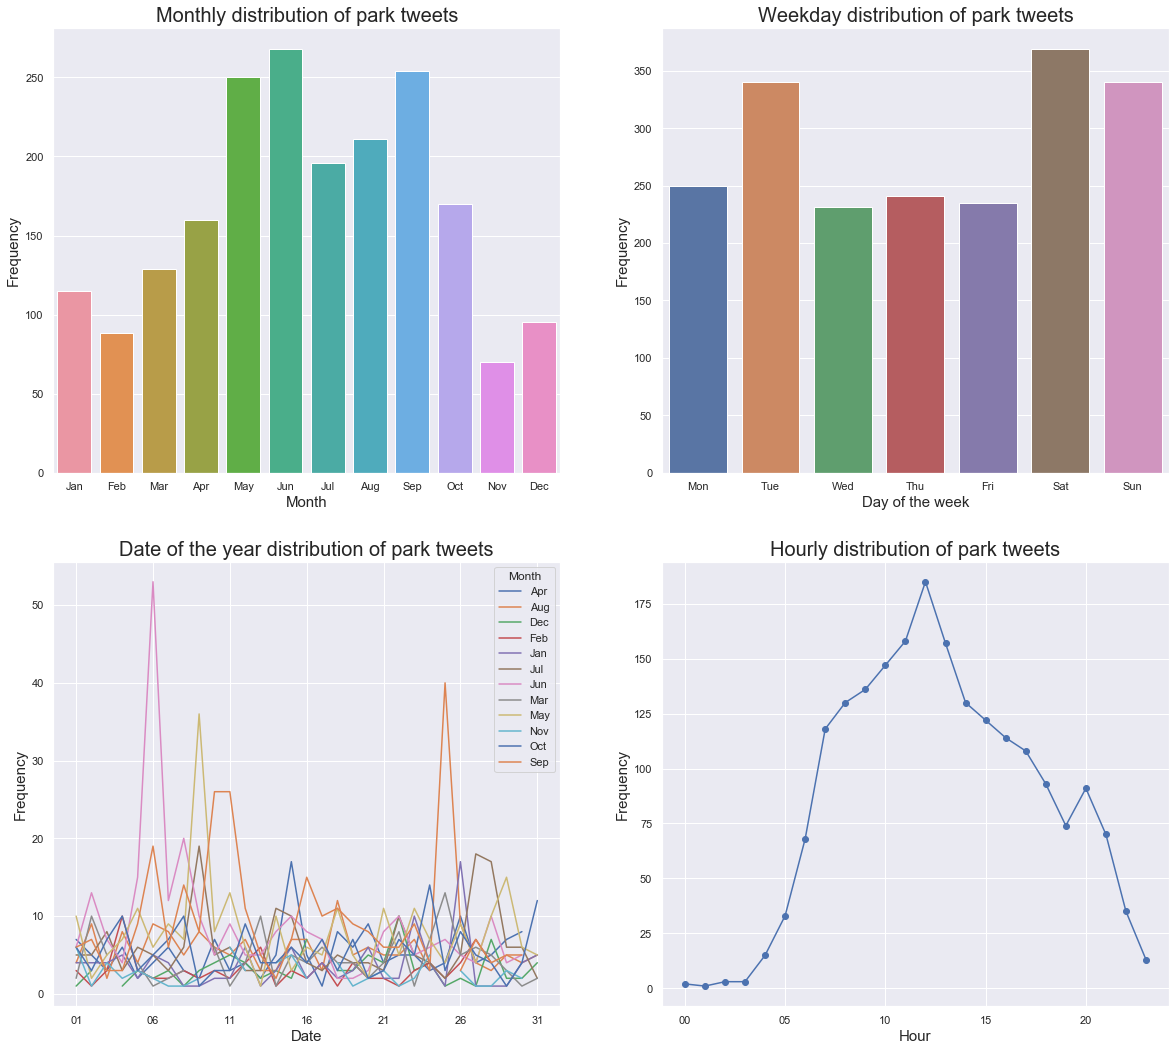

In [25]:
''' The function below reads the Twitter-data(Json-file) and creates a 2X2 plot of the df_time(the time Dataframe above) using Seaborn. 
The created plots are the following:

1: Monthly distrubtion of Tweets. x-axis:months, y-axis:Frequency.
2: Weekday distrubtion of Tweets. x-axis:weekday, y-axis:Frequency.
3: Date of the year distrubtion of Tweets. x-axis:Date, y-axis:Frequency.
4: Hourly distrubtion of Tweets. x-axis:Hour, y-axis:Frequency.
'''




def main():
    
    # Reading data: change the file_name for each park
    Tweet_Data=Open_File('TwitterData_Json'+'/Hagaparken_Tweet15-19.json')
    df_time= ToDataframe_time(Tweet_Data)
    
    # Initiation figure
    sns.set(rc={'figure.figsize':(12,10)})
    sns.set_palette('deep')
    fig,ax= plt.subplots(2,2,figsize=(20,18))

    
    # Month
    ax_month=sns.countplot(x='Month',order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],data=df_time, ax=ax[0][0])
    ax_month.set_xlabel('Month',fontsize=15) 
    ax_month.set_ylabel('Frequency',fontsize=15)
    ax_month.set_title('Monthly distribution of park tweets',fontsize=20)
    
    # Dayofweek
    ax_week=sns.countplot(x='Dayofweek',order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],data=df_time,ax=ax[0][1])
    ax_week.set_xlabel('Day of the week',fontsize=15) 
    ax_week.set_ylabel('Frequency',fontsize=15)
    ax_week.set_title('Weekday distribution of park tweets',fontsize=20)

    # Hour
    ax_hour=df_time.groupby('Hour')['Timestamp'].count().plot(marker='o',ax=ax[1][1])
    ax_hour.set_xlabel('Hour',fontsize=15) 
    ax_hour.set_ylabel('Frequency',fontsize=15)
    ax_hour.set_title('Hourly distribution of park tweets',fontsize=20)
    
    
    # Date of the year
    date_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    ax_date=df_time.groupby(['Month','Date'])['Timestamp'].count().unstack(level=0).plot(ax=ax[1][0])
    ax_date.set_xlabel('Date',fontsize=15) 
    ax_date.set_ylabel('Frequency',fontsize=15)
    ax_date.set_title('Date of the year distribution of park tweets',fontsize=20)
    
    fig.show()
    #fig.savefig('filename_plot.pdf') 

    
main()




